In [43]:
# Importando as bibliotecas essenciais para Análise de Dados e Visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhor visualização dos gráficos no notebook
%matplotlib inline 
sns.set_style("whitegrid")

# 1. CARREGANDO O DATASET
# O caminho está correto pois o notebook está em 'notebooks' e o arquivo em 'dados'
df = pd.read_csv('../dados/netflix_titles.csv') 

print("Tamanho do Dataset:", df.shape) # Verifica o número de linhas e colunas
print("\nPrimeiras 5 linhas do Dataset:")
print(df.head()) # Mostra as primeiras 5 linhas para inspeção inicial

Tamanho do Dataset: (8807, 12)

Primeiras 5 linhas do Dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021  

In [44]:
# Verificando os tipos de dados e a presença de valores nulos (NaN)
print("Informações do DataFrame:")
print(df.info())

# Contando os valores nulos por coluna
print("\nContagem de Valores Nulos (NaN) por Coluna:")
print(df.isnull().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Contagem de Valores Nulos (NaN) por Coluna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating  

In [45]:
# 1. Colunas com muitos valores ausentes que não usaremos em cálculos numéricos
colunas_para_preencher = ['director', 'cast', 'country', 'date_added']
df[colunas_para_preencher] = df[colunas_para_preencher].fillna('Missing')

# 2. Removendo a coluna 'rating' que tem poucos valores faltantes e é crucial
# Vamos remover linhas onde 'rating' é nulo (cerca de 4 linhas)
df.dropna(subset=['rating'], inplace=True)

# 3. Verificação final
print("\nContagem de Nulos após o Tratamento:")
print(df.isnull().sum())


Contagem de Nulos após o Tratamento:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [46]:
# AJUSTE FINAL: Removendo as 3 linhas restantes com NaN na coluna 'duration'
df.dropna(subset=['duration'], inplace=True)

# Verificação final para confirmar 0 nulos
print("Contagem de Nulos após Ajuste Final:")
print(df.isnull().sum())

# Verificando as primeiras linhas e o novo tamanho para garantir a integridade
print("\nNovo Tamanho do Dataset:", df.shape)
print("\nPrimeiras 3 linhas do Dataset:")
print(df.head(3))

Contagem de Nulos após Ajuste Final:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Novo Tamanho do Dataset: (8800, 12)

Primeiras 3 linhas do Dataset:
  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          Missing   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            Missing  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Missing   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021

C:\Users\Borys\AppData\Local\Temp\ipykernel_17112\1287294502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_tipo.index, y=contagem_tipo.values, palette='viridis')


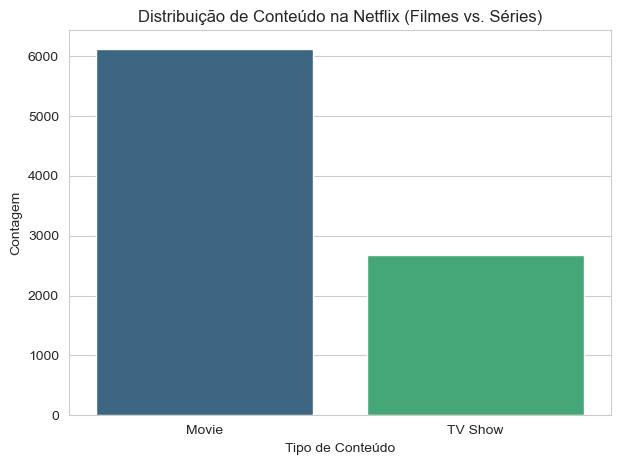

Contagem de Conteúdo:
type
Movie      6126
TV Show    2674
Name: count, dtype: int64


In [47]:
# Contagem de Filmes (Movie) vs. Séries de TV (TV Show)
contagem_tipo = df['type'].value_counts()

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=contagem_tipo.index, y=contagem_tipo.values, palette='viridis')
plt.title('Distribuição de Conteúdo na Netflix (Filmes vs. Séries)')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Contagem')
plt.show()

print("Contagem de Conteúdo:")
print(contagem_tipo)

In [48]:
# Expandindo os gêneros (listed_in) para linhas separadas
# 1. Copia o DataFrame para garantir a integridade
df_generos = df.copy()

# 2. Divide a string de gêneros e explode (cria uma nova linha para cada gênero)
df_generos['listed_in'] = df_generos['listed_in'].apply(lambda x: x.split(', '))
df_generos_explode = df_generos.explode('listed_in')

# 3. Exibe as primeiras linhas após a separação
print("Primeiras linhas do DataFrame com gêneros separados:")
print(df_generos_explode[['title', 'listed_in']].head())

Primeiras linhas do DataFrame com gêneros separados:
                  title               listed_in
0  Dick Johnson Is Dead           Documentaries
1         Blood & Water  International TV Shows
1         Blood & Water               TV Dramas
1         Blood & Water            TV Mysteries
2             Ganglands          Crime TV Shows


C:\Users\Borys\AppData\Local\Temp\ipykernel_17112\3732539724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_generos.index, y=top_10_generos.values, palette='plasma')


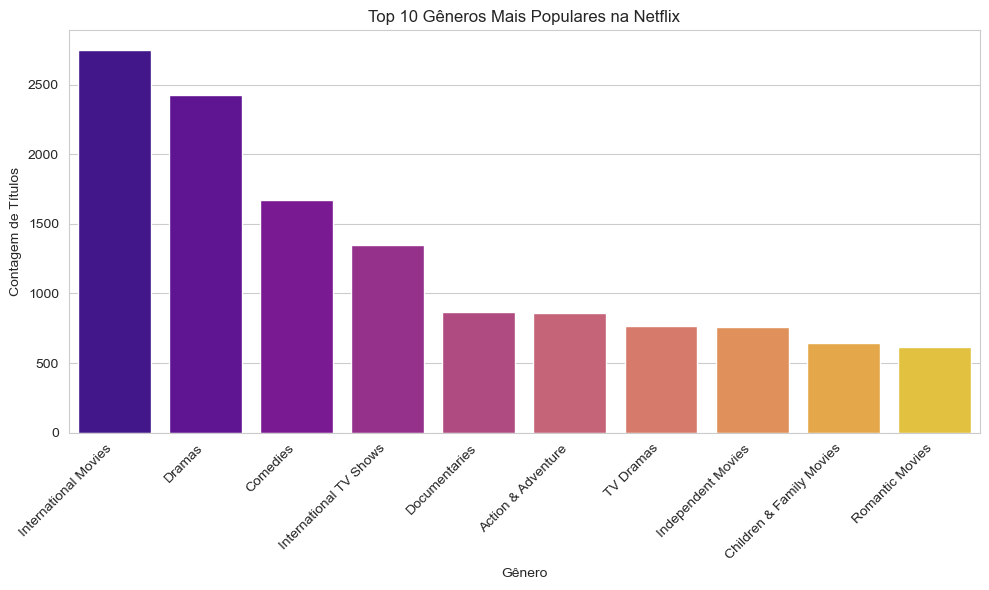


Top 10 Gêneros:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [49]:
# Contagem e seleção dos 10 principais gêneros
top_10_generos = df_generos_explode['listed_in'].value_counts().nlargest(10)

# Criando o gráfico de barras dos Top 10 Gêneros
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_generos.index, y=top_10_generos.values, palette='plasma')
plt.title('Top 10 Gêneros Mais Populares na Netflix')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Títulos')
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos gêneros para melhor visualização
plt.tight_layout()
plt.show()

print("\nTop 10 Gêneros:")
print(top_10_generos)

In [50]:
# 1. Filtrar apenas o conteúdo do tipo 'Movie'
df_filmes = df[df['type'] == 'Movie'].copy()

# 2. Remover o texto " min" da coluna 'duration' para deixar apenas o número
df_filmes['duration'] = df_filmes['duration'].str.replace(' min', '')

# 3. Converter a coluna 'duration' para o tipo numérico (int)
df_filmes['duration'] = pd.to_numeric(df_filmes['duration'])

print("Primeiras 3 linhas do DataFrame de Filmes (Duração Limpa):")
print(df_filmes[['title', 'duration']].head(3))
print("\nTipos de dados após a conversão (Duration deve ser int64):")
print(df_filmes.info())

Primeiras 3 linhas do DataFrame de Filmes (Duração Limpa):
                              title  duration
0              Dick Johnson Is Dead        90
6  My Little Pony: A New Generation        91
7                           Sankofa       125

Tipos de dados após a conversão (Duration deve ser int64):
<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   int64 
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes:

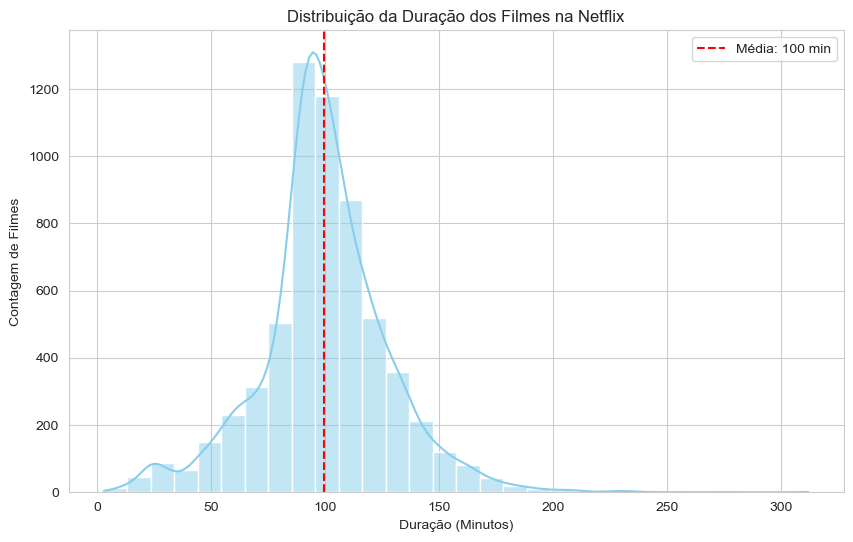


Duração média dos filmes na Netflix: 100 minutos


In [51]:
# Criando um histograma para visualizar a distribuição da duração dos filmes
plt.figure(figsize=(10, 6))
sns.histplot(df_filmes['duration'], bins=30, kde=True, color='skyblue')

# Calculando e marcando a duração média no gráfico
duracao_media = df_filmes['duration'].mean()
plt.axvline(duracao_media, color='red', linestyle='--', label=f'Média: {duracao_media:.0f} min')

plt.title('Distribuição da Duração dos Filmes na Netflix')
plt.xlabel('Duração (Minutos)')
plt.ylabel('Contagem de Filmes')
plt.legend()
plt.show()

print(f"\nDuração média dos filmes na Netflix: {duracao_media:.0f} minutos")